
# <p style="text-align: center;">EE 461P: Data Science Principles</p>
# <p style="text-align: center;">Assignment 2</p>
## <p style="text-align: center;">Total points: 85</p>
## <p style="text-align: center;">Due: Tuesday, October 2nd, submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Only one student per team needs to submit the assignment on Canvas.  **Please include the name and UTEID for both students on all submitted files (including this notebook).**

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

# Question 0. Bias-variance (15pts)
Use the following code to read in a small set of data and divide it into training and testing sets. Inputs are x; outputs are y.

In [135]:
import numpy as np

data_train = np.genfromtxt('data_q0_train.csv', delimiter=',')
x_train = data_train[:,0].reshape(-1, 1)
y_train = data_train[:,1].reshape(-1, 1)

data_test = np.genfromtxt('data_q0_test.csv', delimiter=',')
x_test = data_test[:,0].reshape(-1, 1)
y_test = data_test[:,1].reshape(-1, 1)

We want to build a model that can predict y for unknown inputs x.

(a) (5pts) Fit a linear model to the training data, and report mean squared error on the test data. Plot the data, fitted model, and predictions, clearly denoting the training, testing, and predicted points.

(b) (5pts) Fit polynomial models of degrees 1, 2, 3, and 5 to the training data, and report mean squared error for both models. Plot the data, the fitted models, and the predicted outputs.

(c) (5pts) Which model performed the best? Explain using the bias-variance tradeoff.

## Answer

# 0.a)

6455.70845383


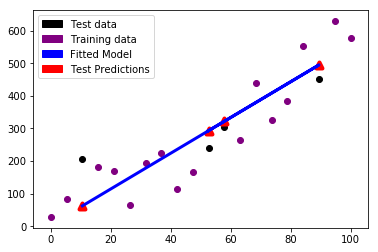

array([[ 52.63157895],
       [ 57.89473684],
       [ 89.47368421],
       [ 10.52631579]])

In [137]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import matplotlib.patches
import matplotlib.lines
import pandas as pd

%matplotlib inline

lr = LinearRegression()
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)

print(metrics.mean_squared_error(y_test, y_pred))
plt.scatter(x_test, y_test, color='black')
plt.scatter(x_train, y_train, color='purple')
plt.plot(x_test, y_pred, color='blue', linewidth=3)
plt.scatter(x_test,y_pred,color="red",marker="^",linewidth=4)
black_patch = matplotlib.patches.Patch(color='black', label='Test data')
purple_patch = matplotlib.patches.Patch(color='purple', label='Training data')
blue_patch = matplotlib.patches.Patch(color='blue', label='Fitted Model')
red_patch = matplotlib.patches.Patch(color='red', label='Test Predictions')
plt.legend(handles=[black_patch, purple_patch, blue_patch,red_patch])

plt.show()
x_test

# 0.b)

In [139]:
def fit_poly_model(order=1):  
    data_train = np.genfromtxt('data_q0_train.csv', delimiter=',')
    x_train = data_train[:,0].reshape(-1, 1)
    y_train = data_train[:,1].reshape(-1, 1)

    data_test = np.genfromtxt('data_q0_test.csv', delimiter=',')
    x_test = data_test[:,0].reshape(-1, 1)
    y_test = data_test[:,1].reshape(-1, 1)

    x_train = x_train.ravel()
    y_train = y_train.ravel()

    x_test = np.sort(x_test.ravel())

    m = np.polyfit(x_train, y_train, order)
    y = np.polyval(m, x_test)

    x_model_fit = range(0,100)
    y_model_fit =np.polyval(m,x_model_fit)

    plt.plot(x_model_fit,y_model_fit,color='blue')
    plt.scatter(x_test, y_test, color='black')
    plt.scatter(x_train, y_train, color='purple')
    plt.scatter(x_test, y, color='red',marker="^", linewidth=4)

    black_patch = matplotlib.patches.Patch(color='black', label='Test data')
    purple_patch = matplotlib.patches.Patch(color='purple', label='Training data')
    blue_patch = matplotlib.patches.Patch(color='blue', label='Fitted Model')
    red_patch = matplotlib.patches.Patch(color='red', label='Test Predictions')
    plt.legend(handles=[black_patch, purple_patch, blue_patch,red_patch])
    plt.title("Linear Regression with Polynomial of Order " + str(order))

    y_test = y_test.transpose().ravel()
    mse = ((y - y_test)**2).mean(axis=0)

    plt.show()

    print("MSE for order " + str(order) + " polynomial is: " + str(mse))

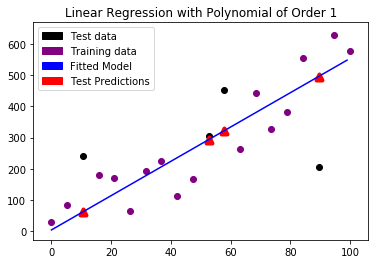

MSE for order 1 polynomial is: 32992.971755


In [140]:
fit_poly_model(order=1)

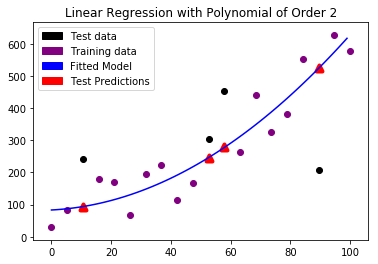

MSE for order 2 polynomial is: 38973.5653627


In [141]:
fit_poly_model(order=2)

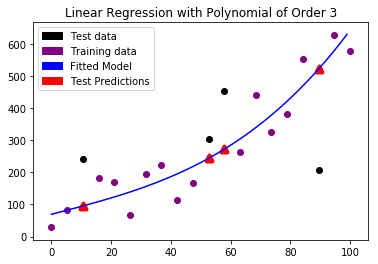

MSE for order 3 polynomial is: 39112.2694617


In [142]:
fit_poly_model(order=3)

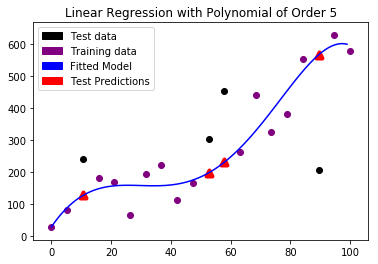

MSE for order 5 polynomial is: 50418.954766


In [143]:
fit_poly_model(order=5)

# 0.c)
### The first order polynomail fit our data better than the the 2nd, 3rd or 5th order polynomails. This makes sense as increasing the complexity of our model ought to make the bias go down (if averaged over many many samples) while increasing our variance. We observed this decrease in bias in that our predictions fell toward the center of the cloud of training data points, and we observed the increase in variance in the greater MSE.

# Question 1. Data Exploration (23pts)
Use the following code to import the dataset.

In [136]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#read the data
data = pd.read_csv('data_q1.csv', index_col=0)

The columns are:
  * TV: advertising dollars spent on TV for a single product (in thousands of dollars)
  * Radio: advertising dollars spent on Radio
  * Newspaper: advertising dollars spent on Newspaper
  * Sales (dependent variable): sales of a single product in a given market (in thousands of widgets)

We are interested in predicting sales based on the first three "feature" variables (TV, Radio and Newspaper).

(a) (2pt) Print the shape (number of rows and columns) of the data matrix and show the first 5 rows.

(b) (4pts) Generate box-plots for each of the four columns and identify the cutoff values for outliers. 

(c) (4pts) Visualize the relationship between the features and the response variable (Sales) using scatterplots. Comment on the fits.

(d) (4pts) Fit a simple linear regression of 'Sales' on 'TV'. What is the regression coefficient for 'TV'? What is its interpretation?

Now split the data randomly into a training and test set (keep one third of the data for test).

(e) (4pts) Fit an MLR on all the feature variables using the training data and evaluate the trained model on the test data using root mean squared error.

(f) (3pts) Report the MSE obtained on train data. How much does this increase when you score your model on test data?

(g) (2pts) Report the coefficients obtained by your model.

## Answer

# 1.a)

In [144]:
print(data.shape)
data.head(n=5)

(200, 4)


,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


# 1.b)

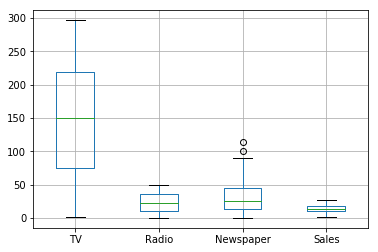

In [145]:
data.boxplot(column=['TV', 'Radio', 'Newspaper', 'Sales'])

# Outliers are any datapoints outside the following ranges:
    TV:         75<np<220
    Radio:      10<np<40
    Newspaper:  15<np<48
    Sales:      5<np<20

# 1.c)

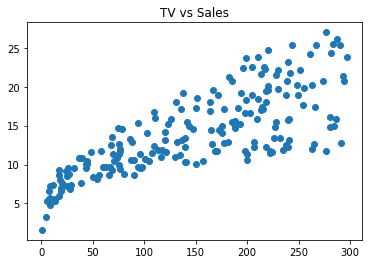

In [147]:
plt.scatter(data['TV'], data['Sales'])
plt.title('TV vs Sales')

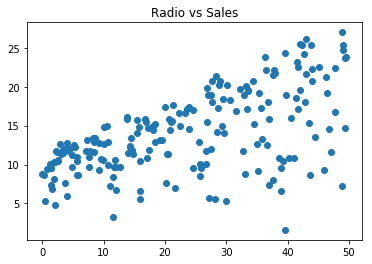

In [148]:
plt.scatter(data['Radio'], data['Sales'])
plt.title('Radio vs Sales')

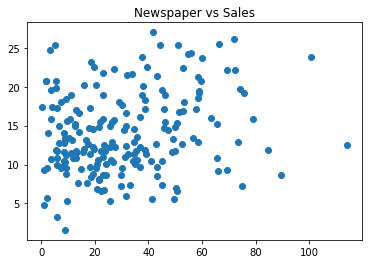

In [149]:
plt.scatter(data['Newspaper'], data['Sales'])
plt.title('Newspaper vs Sales')

### We observe an approximately linear trend between amount of TV dollars spent and number of widgets sold, It looks logarithmic near zero, but there is not enough data to confidently say it is a logarithmic trend. Past 100K dollars spent, the variance in sales grows rapidly and should be renormalized in preproccessing otherwise you risk very low degrees of confidence in your predictions.

### Toward the upper boundary of our data we observe a strong linear trend between Radio dollars and widgets sold, but the data is also relatively messy under this primary linear trend. These outliers will probably affect the offset of the fitted model but does not seem like it will affect slope as it is consistent across the dollars sold axis.  

### The lack of very low sales past 20k dollars spent, suggests some correlation in newspaper spending and sales, but there doesn't seem to be a polynomial correlation between increases in newspaper ad spending and widget sales. At a glance, it looks as if it could be gaussian, but it seems skewed toward the origin.

# 1.d)

Slope = [[ 0.04753664]]
Y-Intercept = [ 7.03259355]


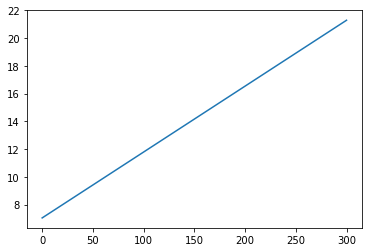

In [150]:
#read fresh data
data = pd.read_csv('data_q1.csv', index_col=0)

lr = LinearRegression()

x_train = pd.DataFrame(data.TV.values.flatten())
y_train = pd.DataFrame(data.Sales.values.flatten())

lr.fit(x_train, y_train)

rng = np.linspace(0,300)
newx = pd.DataFrame(rng)
y = lr.predict(newx)

plt.plot(newx, y)

print('Slope = ' + str(lr.coef_))
print('Y-Intercept = ' + str(lr.intercept_))


### The interpretation of the slope and Y-intercept is that they are the two items which make up our linear model. For any X I am given, I will predict Y as Y = .0475x + 7.0326

In [152]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=.333)

# 1.e)

In [153]:
lr = LinearRegression()

x_train = train.drop("Sales",axis=1)
y_train = pd.DataFrame(train.Sales.values.flatten())

x_test = test.drop('Sales',axis=1)
y_test = pd.DataFrame(test.Sales.values.flatten())
lr.fit(x_train, y_train)
yhat = pd.DataFrame(lr.predict(x_test).ravel())
MSE = ((y_test - yhat)**2).mean()
print("MSE of Test data = " + str(MSE[0]))
yhat = pd.DataFrame(lr.predict(x_train).ravel())
MSE = ((y_train - yhat)**2).mean()
print("MSE of Training data = " + str(MSE[0]))
print("Regression Coefficients: " + str(lr.coef_))



MSE of Test data = 3.01085850048
MSE of Training data = 2.69001206759
Regression Coefficients: [[ 0.04541429  0.19384358 -0.00276171]]


# 1.f) 
### The MSE improves only by about .11 when run on training data. 

# 1.g)
### The coefficients of our model are [0.0473, 0.1835, 0.0039]

# Question 2. Regression with Feature Selection and Outlier Detection (20pts)

In this problem, we will build a predictive model to estimate the market price using the Dow-Jones index (https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average). To simplify the problem, we will use previous weeks' price and volume.

In [7]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

df = pd.read_csv('dow_jones_index.data')
df = df.dropna()
X_df = df[[
        u'open', u'high', u'low', u'close',
        u'percent_change_price',
        u'volume', 
        u'previous_weeks_volume',
        u'percent_change_volume_over_last_wk']]

feature_name = list(X_df.columns.values)

# check the first 5 rows of data loaded
pd.DataFrame.head(X_df)


,open,high,low,close,percent_change_price,volume,previous_weeks_volume,percent_change_volume_over_last_wk
1,$16.71,$16.71,$15.64,$15.97,-4.428490,242963398,239655616.0,1.380223
2,$16.19,$16.38,$15.60,$15.79,-2.470660,138428495,242963398.0,-43.024959
3,$15.87,$16.63,$15.82,$16.13,1.638310,151379173,138428495.0,9.355500
4,$16.18,$17.39,$16.18,$17.14,5.933250,154387761,151379173.0,1.987452
5,$17.33,$17.48,$16.97,$17.37,0.230814,114691279,154387761.0,-25.712195


In [4]:
# response
y = df[[u'next_weeks_open']]
print('The target values is as below.')
pd.DataFrame.head(y)

The target values is as below.


,next_weeks_open
1,$16.19
2,$15.87
3,$16.18
4,$17.33
5,$17.39


In [5]:
# data cleaning
X = X_df.values
for feat in range(X.shape[1]):
    try:
        if "$" in X[0, feat]:
            X[:,feat] = [i.split("$")[1] for i in X[:,feat]]
    except:
        pass
X = X.astype('float')

# normalization
X = (X - np.mean(X, axis=0))/np.std(X, axis=0)

# convert a type of data into matix
y = y.values
y = [i.split("$")[1] for i in y[:, 0]]
y = np.array(y)
y = y.astype('float')

# divide the set into training and test set.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33, random_state=20)

### Forward/ backward feature selection.

(a) (3pts) Calculate the MSE of the training set using linear regression.



In [16]:
lr = LinearRegression()
lr.fit(X_train, y_train)
yhat = lr.predict(X_test)
print("MSE for part a) = " + str(((y_test - yhat)**2).mean()))

MSE for part a) = 0.196018945792


(b) (3pts) Find the three most significant factors using (1) forward feature selection and (2) backward feature selection. Please install and use MLXTEND package for above feature selections (https://anaconda.org/conda-forge/mlxtend). You may find the following link helpful: https://rasbt.github.io/mlxtend/user_guide/feature_selection/SequentialFeatureSelector/#example-5-sequential-feature-selection-for-regression. Please set the cross-validation parameter to 3 (cv=3).



In [20]:
#from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression, HuberRegressor

(c) (2pt) Are the three most significant features found using forward and backward feature selection the same?

### Huber Loss function and outlier

In the second part, we will fit a linear model to the data, using a Huber loss function rather than the L2 norm usually used in OLS. sklearn has a nice API you can use: [http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.HuberRegressor.html#sklearn-linear-model-huberregressor](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.HuberRegressor.html#sklearn-linear-model-huberregressor). For this problem, we will consider only one feature: "percent\_change\_price".

In [17]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

df = pd.read_csv('dow_jones_index.data')
stock = df[["percent_change_price", "next_weeks_open"]]
stock = stock.dropna()
stock = stock.values[1:]
stock[:, 1] = [i.split("$")[1] for i in stock[:, 1]]
stock = stock.astype('float')
stock[:, 0] = (stock[:, 0] - np.mean(stock[:, 0], axis=0))/np.std(stock[:, 0], axis=0)

X = stock[:,:1]
y = stock[:, 1]

X_train = X[:400,]
y_train = y[:400]

X_test = X[400:,]
y_test = y[400:,]

(d) (2pts) Calculate the MSE using linear regression (linear_model.LinearRegression) using this single feature. Please do not use any regularization coefficient (set $\lambda=0$).


# 2.d) 

In [18]:
lr = LinearRegression()
lr.fit(X_train, y_train)
yhat = lr.predict(X_test)
print("MSE = " + str(((yhat-y_test)**2).mean()))

MSE = 1192.17336874



(e) (2pts) Calculate the MSE using Huber regression (linear_model.HuberRegressor) and compare with the result obtained in (d).

Now we purposefully insert an outlier into the training set. Please note that this is simply for academic purpose.


# 2.e)

In [22]:
hr = HuberRegressor()
hr.fit(X_train, y_train)
yhat = hr.predict(X_test)
print("Huber Loss = "+ str(((yhat-y_test)**2).mean()))

Huber Loss = 1235.96980953


In [26]:
y_train_outliers = np.copy(y_train)
y_train_outliers[0] = 10000.0

(f) (3pts) Please repeat (d) and (e) with above y_train_outliers, rather than y_train.


# 2.f) Answer

In [30]:
#part d with outliers
lr = LinearRegression()
lr.fit(X_train, y_train_outliers)
yhat = lr.predict(X_test)
print("MSE with outliers = " + str(((yhat-y_test)**2).mean()))

MSE with outliers = 3570.05063993


In [29]:
#part e with outliers
hr = HuberRegressor()
hr.fit(X_train, y_train_outliers)
yhat = hr.predict(X_test)
print("Huber Loss with outliers = "+ str(((yhat-y_test)**2).mean()))

Huber Loss with outliers = 1232.54690548



(g) (5pts) Which one shows better MSE with an outliers in this exmaple, between Linear regression versus Huber regression? Please describe the reason.  

## Answer

# 2.g) Answer

The Huber loss function responds better to outlier data points. This is because the Huber loss function appropriately weights outlier points so that they are taken into account while not completely dominating the error function. 


# Question 3. Sampling (6pts)

A recent survey estimated that $30\%$ of all Europeans aged 20 to 22 have driven under the influence of drugs or alcohol, based on a simple "Yes or No" question. A similar survey is being planned for Americans. The survey designers want the  $90\%$ confidence interval to have a margin of error of at most $\pm0.09$.

(a) (2pts) Find the necessary sample size needed to conduct this survey assuming that the expected percentage of "yes" answers will be very close to that obtained from the European survey?

(b) (2pts) Suppose the tolerance level was kept the same but the confidence level needs to increase to $95\%$. What is the required sample size for this new specification?

(c) (2pts) If one does not know where the true "$p$" may lie, one can conservatively conduct a survey assuming the worst case (in terms of required minimum sample size)  scenario of  $p = 0.5$. Redo part (b) for this "worst case" scenario.

## Answer

# 3.a) 
We know that the minimum sample size, n, needed to conduct this survey is: $$n=p(1-p)(z/c)^2$$ 

where Z is the confidence, and c is the margin or error
$$ = (0.3)(1-0.3) \left( \frac{1.64}{0.09}\right)^2 = 69.7303703704 \rightarrow 70\ people$$

# 3.b) 
Using the above work, we may change z=1.96, which is representative of the x-values in a normal distribution which enclose 95% of the distribution.

$$ n=(.3)(1-.3)(1.96/.09)^2 $$

We find the minimum number of samples to be:

$$ n=99.6 \rightarrow 100\ people $$

# 3.c) 
Changing p from .3 to .5 and solving for n yields: 

$$ n=(.5)(1-.5)(1.96/.09)^2 $$

We find the minimum number of samples to be:

$$ n=118.57 \rightarrow 119\ people$$

# Question 4. Principal Component Analysis (11pts)

Use the following code to read in data of US Imports.

In [182]:
import pandas as pd
from sklearn.decomposition import PCA

df = pd.read_csv('data_q4.csv', index_col=0)
df.iloc[:5,:5]

,"Agricultural machinery, equipment","Alcoholic beverages, excluding wine","Apparel, household goods - cotton","Apparel, household goods - wool","Apparel, textiles, nonwool or cotton"
Country,,,,,
Afghanistan,3105.0,0.0,10739.0,7314.0,11942.0
Albania,0.0,34741.0,2752171.0,50838.0,1298224.0
Algeria,0.0,0.0,0.0,0.0,0.0
Andorra,0.0,0.0,351.0,0.0,0.0
Angola,0.0,24505.0,0.0,0.0,0.0


(a) (3pts) Find the top two principal components from this dataset, and make a scatter plot with the first component as the x-axis and the second as the y-axis. You may find the sklearn PCA package to be useful.


# 4.a)

In [183]:
pca = PCA(n_components = 2)
pca.fit(df)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [185]:
"""
This will print out the top two components. 
But it takes up a lot of space in the notebook so I commented it out.
Feel free to uncomment.
"""
#pca.components_

'\nThis will print out the top two components. \nBut it takes up a lot of space in the notebook so I commented it out.\nFeel free to uncomment.\n'

In [157]:
reduced = pca.transform(df)
reduced = pd.DataFrame(reduced, columns = ["X", "Y"])
reduced = reduced.set_index(df.index)

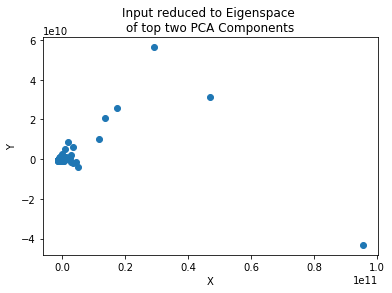

In [158]:
plt.scatter(reduced["X"], reduced["Y"])
plt.title("Input reduced to Eigenspace \nof top two PCA Components")
plt.xlabel("X")
plt.ylabel("Y")

(b) (2pts) Find the names of the six countries with the highest first component (these should be clear outliers).

# 4.b)

In [159]:
outliers = reduced.loc[reduced["X"] > 1e10]
print("Outliers are the following countries:")
outliers

Outliers are the following countries:


,X,Y
Country,,
Canada,2.923415e+10,5.640749e+10
China,9.536235e+10,-4.322857e+10
Germany,1.371234e+10,2.087806e+10
Japan,1.740350e+10,2.578182e+10
"Korea, South",1.172214e+10,1.003584e+10
Mexico,4.695118e+10,3.108013e+10



(c) (3pts) Create i) a scree plot depicting the proportion of variance and ii) a cumulative proportion of variance explained by the principal components of the data (X matrix).  Refer to Figure 10.4 of JW for an example.  If you are using sklearn's PCA implementation, you may use the output attribute *explained variance ratio*.


# 4.c)

In [160]:
df.shape

(231, 142)

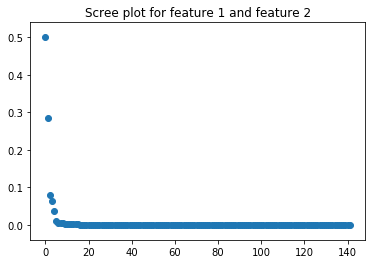

In [161]:
pca = PCA(n_components=df.shape[1])
pca.fit(df)
plt.scatter(range(0,df.shape[1]),pca.explained_variance_ratio_, label = "Proportion of Variance")
plt.title("Scree plot for feature 1 and feature 2")

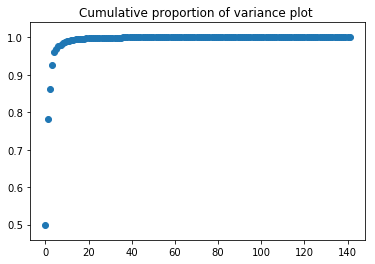

In [162]:
variances = pca.explained_variance_ratio_
cum_var = [variances[i] + variances[:i].sum() for i in range(variances.shape[0])]
plt.scatter(range(len(cum_var)),cum_var)
plt.title("Cumulative proportion of variance plot ")

(d) (3pts) How many principal components are required to explain cumulative variance of 30%, 60%, and 90%, respectively?

# 4.d)

In [177]:
cum_var = pd.DataFrame(cum_var)
print("The first component explains ~30% of the variance.\n(30%)")
print(cum_var.loc[cum_var[0] > 0.3].head())
print("\n")
print("The first two components explain ~60% of the Data\n(78%)")
print(cum_var.loc[cum_var[0] > 0.6].head())
print("\n")
print("The first 4 components explain ~90% of the variance\n(92.5%)")
print(cum_var.loc[cum_var[0] > 0.9].head())


The first component explains ~30% of the variance.
(30%)
          0
0  0.499601
1  0.783249
2  0.862489
3  0.925649
4  0.961357


The first two components explain ~60% of the Data
(78%)
          0
1  0.783249
2  0.862489
3  0.925649
4  0.961357
5  0.970244


The first 4 components explain ~90% of the variance
(92.5%)
          0
3  0.925649
4  0.961357
5  0.970244
6  0.976076
7  0.980895


# Question 5. PCA (conceptual) (10pts)

(a) (5pts) Give two reasons why we might want to use PCA.

(b) (5pts) If we approach PCA using eigenvalue decomposition on the covariance matrix, explain what the eigenvectors and eigenvalues represent.

## Answer

## 5.a)
One might use PCA if you know a priori that the underlying structure of the data should exist in a small number of dimensions. PCA will project down to that subspace and cut out all of the 'noise' in extraneous dimensions. 

One might use PCA if you want to be able to plot high dimension data which may be mostly explainable in a small number of dimensions

One might use PCA to reduce the number of features in your model. Perhaps you are using more advanced modeling techniques and you need to 'compress' your features into a smaller vector to reduce overall runtime for your datascience pipieline. 



# 5.b)
The eigenvectors represent the directions in which the datset has high variance and the eigenvalues represent the degree of variance in the corresponding 1-D eigenspace. In essence, PCA is simply changing to the eigenbasis and optionally truncating the lower dimensions by projecting onto a smaller number of eigen vectors (the ones with most variance)